In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

## Импорт данных

In [2]:
# loading train data
df_train = pd.read_csv('train.csv', sep = ';', index_col = 'request_id')
df_train.head()

request_amount  period  insurance_flg  age  sex  incomes  \
request_id                                                             
20059343          500000.0      34              0   52    1      0.0   
20059568          200000.0      34              0   43    1      0.0   
20059712           57000.0      34              0   58    1      0.0   
20059815           50000.0      34              0   50    0      0.0   
20059863          134000.0      34              0   46    0      0.0   

            expences  bank_credit_sum  seniority  children  ...  \
request_id                                                  ...   
20059343         0.0        500000.00          0         0  ...   
20059568         0.0        200000.00          0         0  ...   
20059712         0.0        136232.98          0         0  ...   
20059815         0.0        232850.53          0         0  ...   
20059863         0.0        258000.00          0         0  ...   

            credit_history_flg  nbki_flg  okb_flg  unknown_history_flg  \
request_id                                                               
20059343                     0         1        0                    0   
20059568                     0         1        0                    0   
20059712                     0         1        0                    0   
20059815                     0         1        0                    0   
20059863                     0         1        0                    0   

            worst_history_flg  bad_history_flg  neutral_history_flg  \
request_id                                                            
20059343                    0                0                    0   
20059568                    0                0                    0   
20059712                    0                0                    0   
20059815                    0                0                    0   
20059863                    0                0                    0   

            good_history_flg  perfect_history_flg  result  
request_id                                                 
20059343                   0                    1       1  
20059568                   0                    1       1  
20059712                   1                    0       1  
20059815                   0                    1       1  
20059863                   1                    0       1  

[5 rows x 44 columns]

In [3]:
# loading test test
df_test = pd.read_csv('test.csv', sep = ';', index_col = 'request_id')
df_test.head()

request_amount  period  insurance_flg  age  sex  incomes  \
request_id                                                             
20066226          67000.00      34              0   51    0      0.0   
20073253          54974.74      34              0   57    0      0.0   
20077464          74400.00      34              0   57    0      0.0   
20107491         100000.00      34              0   62    1      0.0   
20117714          25000.00      33              0   57    0      0.0   

            expences  bank_credit_sum  seniority  children  ...  \
request_id                                                  ...   
20066226         0.0         67000.00          0         0  ...   
20073253         0.0         54974.74          0         0  ...   
20077464         0.0         74400.00          0         0  ...   
20107491         0.0        100000.00          0         0  ...   
20117714         0.0         25000.00          0         0  ...   

            credit_history_flg  nbki_flg  okb_flg  unknown_history_flg  \
request_id                                                               
20066226                     0         1        0                    0   
20073253                     0         1        0                    0   
20077464                     0         1        0                    0   
20107491                     0         1        0                    0   
20117714                     0         1        0                    0   

            worst_history_flg  bad_history_flg  neutral_history_flg  \
request_id                                                            
20066226                    0                0                    0   
20073253                    0                0                    0   
20077464                    0                0                    0   
20107491                    0                0                    0   
20117714                    0                0                    0   

            good_history_flg  perfect_history_flg  result  
request_id                                                 
20066226                   0                    1       1  
20073253                   0                    1       1  
20077464                   0                    1       1  
20107491                   0                    1       1  
20117714                   0                    1       1  

[5 rows x 44 columns]

In [4]:
# data size
print('Число строк в train / test:')
print(df_train.shape[0], '/', df_test.shape[0], '\n')

# data size ratio
print('Соотношение train / test:')
print(round(df_train.shape[0] / (df_train.shape[0] + df_test.shape[0]), 2), '/', 
      round(df_test.shape[0]  / (df_train.shape[0] + df_test.shape[0]), 2))

Число строк в train / test:
27192 / 3999 

Соотношение train / test:
0.87 / 0.13


In [5]:
# train data target distribution
df_train['result'].value_counts()

0    18802
1     8390
Name: result, dtype: int64

In [6]:
# test data target distribution
df_test['result'].value_counts()

0    2963
1    1036
Name: result, dtype: int64

### Описание признаков
![](info_all.jpg)

## Графики зависимостей целевой переменной

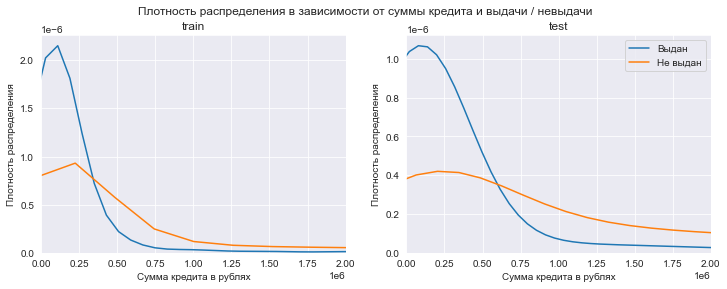

In [7]:
# distribution density graph on the loan amount
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle('Плотность распределения в зависимости от суммы кредита и выдачи / невыдачи')

# train
ax1.set_title('train')
sns.kdeplot(df_train.loc[df_train['result'] == 1, 'request_amount'], label = 'Выдан', ax = ax1)
sns.kdeplot(df_train.loc[df_train['result'] == 0, 'request_amount'], label = 'Не выдан', ax = ax1)
ax1.set(xlabel = 'Сумма кредита в рублях', ylabel = 'Плотность распределения', xlim = (0, 2000000))

# test
ax2.set_title('test')
sns.kdeplot(df_test.loc[df_test['result'] == 1, 'request_amount'], label = 'Выдан', ax = ax2)
sns.kdeplot(df_test.loc[df_test['result'] == 0, 'request_amount'], label = 'Не выдан', ax = ax2)
ax2.set(xlabel = 'Сумма кредита в рублях', ylabel = 'Плотность распределения', xlim = (0, 2000000))

plt.legend(loc = 'best')
plt.show()

Чем меньше сумма кредита, те выше вероятность одобрения.

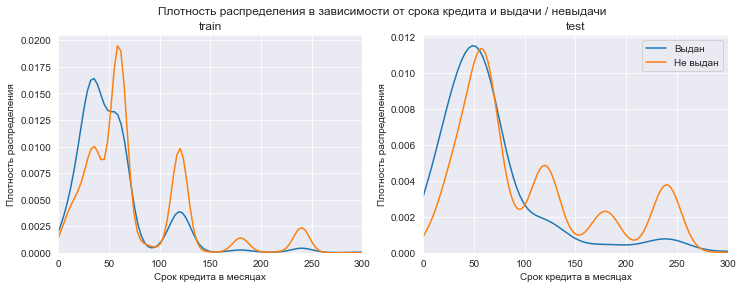

In [8]:
# distribution density graph on the loan perion
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle('Плотность распределения в зависимости от срока кредита и выдачи / невыдачи')

# train
ax1.set_title('train')
sns.kdeplot(df_train.loc[df_train['result'] == 1, 'period'], label = 'Выдан', ax = ax1)
sns.kdeplot(df_train.loc[df_train['result'] == 0, 'period'], label = 'Не выдан', ax = ax1)
ax1.set(xlabel = 'Срок кредита в месяцах', ylabel = 'Плотность распределения', xlim = (0, 300))

# test
ax2.set_title('test')
sns.kdeplot(df_test.loc[df_test['result'] == 1, 'period'], label = 'Выдан', ax = ax2)
sns.kdeplot(df_test.loc[df_test['result'] == 0, 'period'], label = 'Не выдан', ax = ax2)
ax2.set(xlabel = 'Срок кредита в месяцах', ylabel = 'Плотность распределения', xlim = (0, 300))

plt.legend(loc = 'best')
plt.show()

Наибольшее количество кредитных заявок приходится на срок 5 лет (60 месяцев).

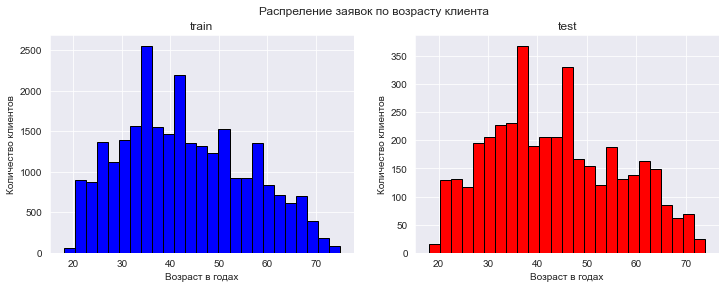

In [9]:
# distribution of clients by the age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle('Распреление заявок по возрасту клиента')
ax1.set_title('train')
ax1.hist(df_train['age'], edgecolor = 'k', color = 'b', bins = 25)
ax1.set(xlabel = 'Возраст в годах', ylabel = 'Количество клиентов')

ax2.set_title('test')
ax2.hist(df_test['age'],  edgecolor = 'k', color = 'r', bins = 25)
ax2.set(xlabel = 'Возраст в годах', ylabel = 'Количество клиентов')

fig.show()

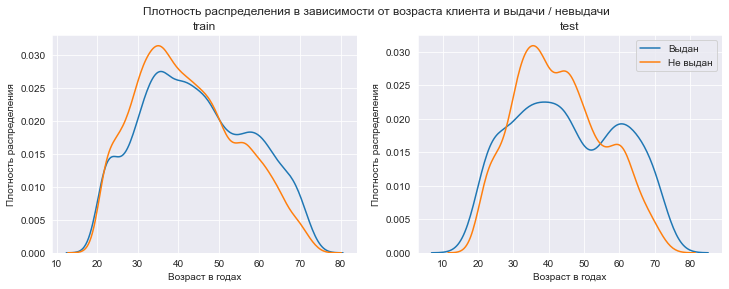

In [10]:
# distribution density graph on the age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle('Плотность распределения в зависимости от возраста клиента и выдачи / невыдачи')

# train
ax1.set_title('train')
sns.kdeplot(df_train.loc[df_train['result'] == 1, 'age'], label = 'Выдан', ax = ax1)
sns.kdeplot(df_train.loc[df_train['result'] == 0, 'age'], label = 'Не выдан', ax = ax1)
ax1.set(xlabel = 'Возраст в годах', ylabel = 'Плотность распределения')

# test
ax2.set_title('test')
sns.kdeplot(df_test.loc[df_test['result'] == 1, 'age'], label = 'Выдан', ax = ax2)
sns.kdeplot(df_test.loc[df_test['result'] == 0, 'age'], label = 'Не выдан', ax = ax2)
ax2.set(xlabel = 'Возраст в годах', ylabel = 'Плотность распределения')

plt.legend(loc = 'best')
plt.show()

Наибольшее количество кредитных заявок поступает от клиентов в возрасте от 35 до 45 лет.

In [11]:
# breakdown by age categories, average age calculation
age_data = pd.concat([df_train, df_test])[['age', 'result']]
age_data['Age_category'] = pd.cut(age_data['age'], bins = np.linspace(20, 70, num = 11))
age_groups  = age_data.groupby('Age_category').mean()
age_groups

age    result
Age_category                     
(20.0, 25.0]  23.026730  0.320755
(25.0, 30.0]  28.223062  0.245072
(30.0, 35.0]  33.062209  0.265884
(35.0, 40.0]  37.888068  0.275576
(40.0, 45.0]  42.954020  0.299484
(45.0, 50.0]  47.897749  0.286746
(50.0, 55.0]  52.921917  0.306146
(55.0, 60.0]  57.893496  0.335869
(60.0, 65.0]  62.781341  0.368805
(65.0, 70.0]  67.856138  0.458170

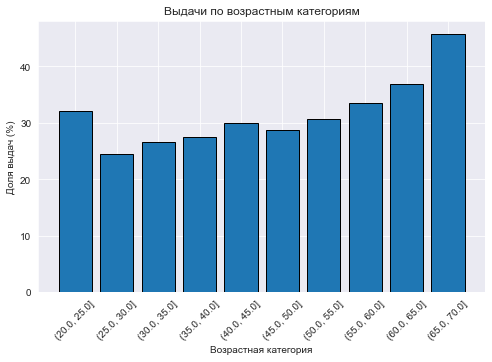

In [12]:
# graph based on the data above
plt.figure(figsize = (8, 5))
plt.bar(age_groups.index.astype(str), 100 * age_groups['result'], edgecolor = 'k')
plt.xticks(rotation = 45)
plt.title('Выдачи по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Доля выдач (%)')
plt.show()

Наименьший процент выдач отмечается в возрастных категориях от 25 до 35 лет.

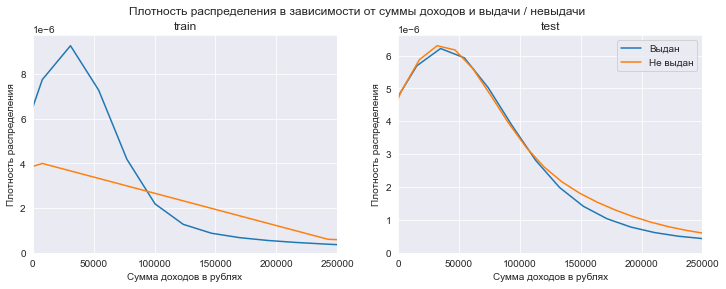

In [13]:
# distribution density graph on the incomes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle('Плотность распределения в зависимости от суммы доходов и выдачи / невыдачи')

# train
ax1.set_title('train')
sns.kdeplot(df_train.loc[df_train['result'] == 1, 'incomes'], label = 'Выдан', ax = ax1)
sns.kdeplot(df_train.loc[df_train['result'] == 0, 'incomes'], label = 'Не выдан', ax = ax1)
ax1.set(xlabel = 'Сумма доходов в рублях', ylabel = 'Плотность распределения', xlim = (0, 250000))

# test
ax2.set_title('test')
sns.kdeplot(df_test.loc[df_test['result'] == 1, 'incomes'], label = 'Выдан', ax = ax2)
sns.kdeplot(df_test.loc[df_test['result'] == 0, 'incomes'], label = 'Не выдан', ax = ax2)
ax2.set(xlabel = 'Сумма доходов в рублях', ylabel = 'Плотность распределения', xlim = (0, 250000))

plt.legend(loc = 'best')
plt.show()

Наиболее часто встречающийся уровень доходов клиентов – от 40 до 50 тыс. руб.

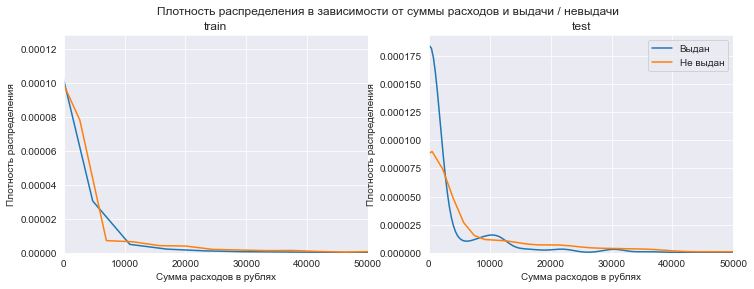

In [14]:
# distribution density graph on the expences
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle('Плотность распределения в зависимости от суммы расходов и выдачи / невыдачи')

# train
ax1.set_title('train')
sns.kdeplot(df_train.loc[df_train['result'] == 1, 'expences'], label = 'Выдан', ax = ax1)
sns.kdeplot(df_train.loc[df_train['result'] == 0, 'expences'], label = 'Не выдан', ax = ax1)
ax1.set(xlabel = 'Сумма расходов в рублях', ylabel = 'Плотность распределения', xlim = (0, 50000))

# test
ax2.set_title('test')
sns.kdeplot(df_test.loc[df_test['result'] == 1, 'expences'], label = 'Выдан', ax = ax2)
sns.kdeplot(df_test.loc[df_test['result'] == 0, 'expences'], label = 'Не выдан', ax = ax2)
ax2.set(xlabel = 'Сумма расходов в рублях', ylabel = 'Плотность распределения', xlim = (0, 50000))

plt.legend(loc = 'best')
plt.show()

У большого количества клиентов не указаны расходны.

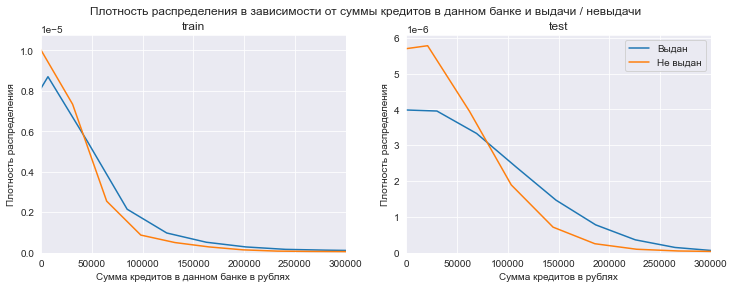

In [15]:
# distribution density graph on the bank credits
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle('Плотность распределения в зависимости от суммы кредитов в данном банке и выдачи / невыдачи')

# train
ax1.set_title('train')
sns.kdeplot(df_train.loc[df_train['result'] == 1, 'bank_credit_sum'], label = 'Выдан', ax = ax1)
sns.kdeplot(df_train.loc[df_train['result'] == 0, 'bank_credit_sum'], label = 'Не выдан', ax = ax1)
ax1.set(xlabel = 'Сумма кредитов в данном банке в рублях', ylabel = 'Плотность распределения', xlim = (0, 300000))

# test
ax2.set_title('test')
sns.kdeplot(df_test.loc[df_test['result'] == 1, 'bank_credit_sum'], label = 'Выдан', ax = ax2)
sns.kdeplot(df_test.loc[df_test['result'] == 0, 'bank_credit_sum'], label = 'Не выдан', ax = ax2)
ax2.set(xlabel = 'Сумма кредитов в рублях', ylabel = 'Плотность распределения', xlim = (0, 300000))

plt.legend(loc = 'best')
plt.show()

У большого количества клиентов не указаны расходы по кредитам либо они не превышеют 25 тыс. руб.

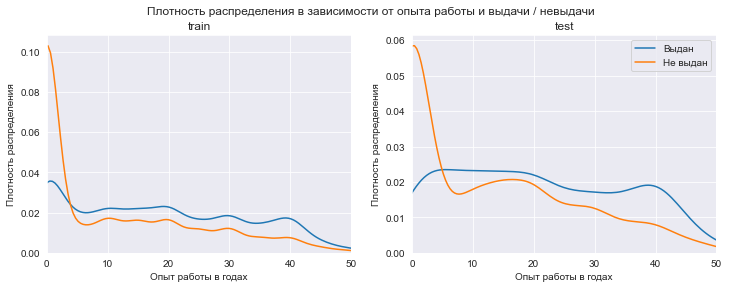

In [16]:
# distribution density graph on the seniority
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle('Плотность распределения в зависимости от опыта работы и выдачи / невыдачи')

# train
ax1.set_title('train')
sns.kdeplot(df_train.loc[df_train['result'] == 1, 'seniority'], label = 'Выдан', ax = ax1)
sns.kdeplot(df_train.loc[df_train['result'] == 0, 'seniority'], label = 'Не выдан', ax = ax1)
ax1.set(xlabel = 'Опыт работы в годах', ylabel = 'Плотность распределения', xlim = (0, 50))

# test
ax2.set_title('test')
sns.kdeplot(df_test.loc[df_test['result'] == 1, 'seniority'], label = 'Выдан', ax = ax2)
sns.kdeplot(df_test.loc[df_test['result'] == 0, 'seniority'], label = 'Не выдан', ax = ax2)
ax2.set(xlabel = 'Опыт работы в годах', ylabel = 'Плотность распределения', xlim = (0, 50))

plt.legend(loc = 'best')
plt.show()

У большого количества клиентов не указан опыт работы.

## Подготовка данных для обучения моделей

In [33]:
# features separation into scalable and others
for_scaling = ['request_amount', 'incomes', 'expences', 'bank_credit_sum']
other_features = np.setdiff1d(df_train.columns.values, for_scaling, assume_unique = True)
other_features = np.delete(other_features, [-1, -2])

In [34]:
# select target
y_train = df_train[['result']]
y_test = df_test[['result']]

In [35]:
# select X_train
X_train = df_train[for_scaling]
X_train = pd.concat((X_train, df_train[other_features]), axis = 1)
X_train.head()

request_amount  incomes  expences  bank_credit_sum  period  \
request_id                                                               
20059343          500000.0      0.0       0.0        500000.00      34   
20059568          200000.0      0.0       0.0        200000.00      34   
20059712           57000.0      0.0       0.0        136232.98      34   
20059815           50000.0      0.0       0.0        232850.53      34   
20059863          134000.0      0.0       0.0        258000.00      34   

            insurance_flg  age  sex  seniority  children  ...  mobile_flg  \
request_id                                                ...               
20059343                0   52    1          0         0  ...           1   
20059568                0   43    1          0         0  ...           1   
20059712                0   58    1          0         0  ...           1   
20059815                0   50    0          0         0  ...           1   
20059863                0   46    0          0         0  ...           1   

            car_flg  credit_history_flg  nbki_flg  okb_flg  \
request_id                                                   
20059343          0                   0         1        0   
20059568          0                   0         1        0   
20059712          0                   0         1        0   
20059815          0                   0         1        0   
20059863          0                   0         1        0   

            unknown_history_flg  worst_history_flg  bad_history_flg  \
request_id                                                            
20059343                      0                  0                0   
20059568                      0                  0                0   
20059712                      0                  0                0   
20059815                      0                  0                0   
20059863                      0                  0                0   

            neutral_history_flg  good_history_flg  
request_id                                         
20059343                      0                 0  
20059568                      0                 0  
20059712                      0                 1  
20059815                      0                 0  
20059863                      0                 1  

[5 rows x 42 columns]

In [36]:
# select X_test
X_test = df_test[for_scaling]
X_test = pd.concat((X_test, df_test[other_features]), axis = 1)
X_test.head()

request_amount  incomes  expences  bank_credit_sum  period  \
request_id                                                               
20066226          67000.00      0.0       0.0         67000.00      34   
20073253          54974.74      0.0       0.0         54974.74      34   
20077464          74400.00      0.0       0.0         74400.00      34   
20107491         100000.00      0.0       0.0        100000.00      34   
20117714          25000.00      0.0       0.0         25000.00      33   

            insurance_flg  age  sex  seniority  children  ...  mobile_flg  \
request_id                                                ...               
20066226                0   51    0          0         0  ...           1   
20073253                0   57    0          0         0  ...           1   
20077464                0   57    0          0         0  ...           1   
20107491                0   62    1          0         0  ...           1   
20117714                0   57    0          0         0  ...           1   

            car_flg  credit_history_flg  nbki_flg  okb_flg  \
request_id                                                   
20066226          1                   0         1        0   
20073253          1                   0         1        0   
20077464          1                   0         1        0   
20107491          1                   0         1        0   
20117714          1                   0         1        0   

            unknown_history_flg  worst_history_flg  bad_history_flg  \
request_id                                                            
20066226                      0                  0                0   
20073253                      0                  0                0   
20077464                      0                  0                0   
20107491                      0                  0                0   
20117714                      0                  0                0   

            neutral_history_flg  good_history_flg  
request_id                                         
20066226                      0                 0  
20073253                      0                 0  
20077464                      0                 0  
20107491                      0                 0  
20117714                      0                 0  

[5 rows x 42 columns]

In [37]:
# data scaling
scaler = StandardScaler()

X_std_train = df_train[for_scaling]
X_std_train = pd.DataFrame(scaler.fit_transform(X_std_train), columns = for_scaling, index = df_train.index)
X_std_train = pd.concat((X_std_train, df_train[other_features]), axis = 1)
X_std_train.head()

request_amount   incomes  expences  bank_credit_sum  period  \
request_id                                                                
20059343         -0.168591 -0.182457 -0.202857         1.940780      34   
20059568         -0.342377 -0.182457 -0.202857         0.692298      34   
20059712         -0.425215 -0.182457 -0.202857         0.426924      34   
20059815         -0.429270 -0.182457 -0.202857         0.829009      34   
20059863         -0.380610 -0.182457 -0.202857         0.933671      34   

            insurance_flg  age  sex  seniority  children  ...  mobile_flg  \
request_id                                                ...               
20059343                0   52    1          0         0  ...           1   
20059568                0   43    1          0         0  ...           1   
20059712                0   58    1          0         0  ...           1   
20059815                0   50    0          0         0  ...           1   
20059863                0   46    0          0         0  ...           1   

            car_flg  credit_history_flg  nbki_flg  okb_flg  \
request_id                                                   
20059343          0                   0         1        0   
20059568          0                   0         1        0   
20059712          0                   0         1        0   
20059815          0                   0         1        0   
20059863          0                   0         1        0   

            unknown_history_flg  worst_history_flg  bad_history_flg  \
request_id                                                            
20059343                      0                  0                0   
20059568                      0                  0                0   
20059712                      0                  0                0   
20059815                      0                  0                0   
20059863                      0                  0                0   

            neutral_history_flg  good_history_flg  
request_id                                         
20059343                      0                 0  
20059568                      0                 0  
20059712                      0                 1  
20059815                      0                 0  
20059863                      0                 1  

[5 rows x 42 columns]

In [39]:
X_std_test = df_test[for_scaling]
X_std_test = pd.DataFrame(scaler.transform(X_std_test), columns = for_scaling, index = df_test.index)
X_std_test = pd.concat((X_std_test, df_test[other_features]), axis = 1)
X_std_test.head()

request_amount   incomes  expences  bank_credit_sum  period  \
request_id                                                                
20066226         -0.419422 -0.182457 -0.202857         0.138804      34   
20073253         -0.426388 -0.182457 -0.202857         0.088759      34   
20077464         -0.415135 -0.182457 -0.202857         0.169600      34   
20107491         -0.400305 -0.182457 -0.202857         0.276137      34   
20117714         -0.443752 -0.182457 -0.202857        -0.035984      33   

            insurance_flg  age  sex  seniority  children  ...  mobile_flg  \
request_id                                                ...               
20066226                0   51    0          0         0  ...           1   
20073253                0   57    0          0         0  ...           1   
20077464                0   57    0          0         0  ...           1   
20107491                0   62    1          0         0  ...           1   
20117714                0   57    0          0         0  ...           1   

            car_flg  credit_history_flg  nbki_flg  okb_flg  \
request_id                                                   
20066226          1                   0         1        0   
20073253          1                   0         1        0   
20077464          1                   0         1        0   
20107491          1                   0         1        0   
20117714          1                   0         1        0   

            unknown_history_flg  worst_history_flg  bad_history_flg  \
request_id                                                            
20066226                      0                  0                0   
20073253                      0                  0                0   
20077464                      0                  0                0   
20107491                      0                  0                0   
20117714                      0                  0                0   

            neutral_history_flg  good_history_flg  
request_id                                         
20066226                      0                 0  
20073253                      0                 0  
20077464                      0                 0  
20107491                      0                 0  
20117714                      0                 0  

[5 rows x 42 columns]

In [40]:
# MinMaxScaling
minmax = MinMaxScaler()

X_minmax_train = df_train[for_scaling]
X_minmax_train = pd.DataFrame(minmax.fit_transform(X_minmax_train), columns = for_scaling, index = df_train.index)
X_minmax_train = pd.concat((X_minmax_train, df_train[other_features]), axis = 1)
X_minmax_train.head()

request_amount  incomes  expences  bank_credit_sum  period  \
request_id                                                               
20059343           0.00998      0.0       0.0         0.066264      34   
20059568           0.00398      0.0       0.0         0.026506      34   
20059712           0.00112      0.0       0.0         0.018055      34   
20059815           0.00098      0.0       0.0         0.030859      34   
20059863           0.00266      0.0       0.0         0.034192      34   

            insurance_flg  age  sex  seniority  children  ...  mobile_flg  \
request_id                                                ...               
20059343                0   52    1          0         0  ...           1   
20059568                0   43    1          0         0  ...           1   
20059712                0   58    1          0         0  ...           1   
20059815                0   50    0          0         0  ...           1   
20059863                0   46    0          0         0  ...           1   

            car_flg  credit_history_flg  nbki_flg  okb_flg  \
request_id                                                   
20059343          0                   0         1        0   
20059568          0                   0         1        0   
20059712          0                   0         1        0   
20059815          0                   0         1        0   
20059863          0                   0         1        0   

            unknown_history_flg  worst_history_flg  bad_history_flg  \
request_id                                                            
20059343                      0                  0                0   
20059568                      0                  0                0   
20059712                      0                  0                0   
20059815                      0                  0                0   
20059863                      0                  0                0   

            neutral_history_flg  good_history_flg  
request_id                                         
20059343                      0                 0  
20059568                      0                 0  
20059712                      0                 1  
20059815                      0                 0  
20059863                      0                 1  

[5 rows x 42 columns]

In [41]:
X_minmax_test = df_test[for_scaling]
X_minmax_test = pd.DataFrame(scaler.transform(X_minmax_test), columns = for_scaling, index = df_test.index)
X_minmax_test = pd.concat((X_minmax_test, df_test[other_features]), axis = 1)
X_minmax_test.head()

request_amount   incomes  expences  bank_credit_sum  period  \
request_id                                                                
20066226         -0.419422 -0.182457 -0.202857         0.138804      34   
20073253         -0.426388 -0.182457 -0.202857         0.088759      34   
20077464         -0.415135 -0.182457 -0.202857         0.169600      34   
20107491         -0.400305 -0.182457 -0.202857         0.276137      34   
20117714         -0.443752 -0.182457 -0.202857        -0.035984      33   

            insurance_flg  age  sex  seniority  children  ...  mobile_flg  \
request_id                                                ...               
20066226                0   51    0          0         0  ...           1   
20073253                0   57    0          0         0  ...           1   
20077464                0   57    0          0         0  ...           1   
20107491                0   62    1          0         0  ...           1   
20117714                0   57    0          0         0  ...           1   

            car_flg  credit_history_flg  nbki_flg  okb_flg  \
request_id                                                   
20066226          1                   0         1        0   
20073253          1                   0         1        0   
20077464          1                   0         1        0   
20107491          1                   0         1        0   
20117714          1                   0         1        0   

            unknown_history_flg  worst_history_flg  bad_history_flg  \
request_id                                                            
20066226                      0                  0                0   
20073253                      0                  0                0   
20077464                      0                  0                0   
20107491                      0                  0                0   
20117714                      0                  0                0   

            neutral_history_flg  good_history_flg  
request_id                                         
20066226                      0                 0  
20073253                      0                 0  
20077464                      0                 0  
20107491                      0                 0  
20117714                      0                 0  

[5 rows x 42 columns]

## Обучение классификаторов

In [42]:
# import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [43]:
# dataframe for results
results = pd.DataFrame(columns  = ['ML Method', 'Data', 'TP', 'FP', 'TN', 'FN', 
                                   'Accuracy', 'Precision', 'Recall', 'F₁-score'])

# initialization of all methods
methods = [
           [LogisticRegression, 'Logistic Regression'], 
           [SVC, 'Support Vector Machine'], 
           [KNeighborsClassifier, 'K-nearest Neighbors Classifier'], 
           [GaussianNB, 'Naive Bayes Classifier'], 
           [DecisionTreeClassifier, 'Decision Tree Classifier'], 
           [RandomForestClassifier, 'Random Forest Classifier'], 
           [AdaBoostClassifier, 'AdaBoost Classifer'], 
           [GradientBoostingClassifier, 'Gradient Boosting Classifier'],
           [XGBClassifier, 'XGBoost Classifer'], 
           [LGBMClassifier, 'LightGBM Classifier']
]

# initialization of all scaling types
data = [[X_train, X_test, 'Без масштабирования'], 
        [X_std_train, X_std_test, 'StandardScaler'], 
        [X_minmax_train, X_minmax_test, 'MinMaxScaler']]

# cycle by methods
for method, title in methods:
    mtd = method()
    print(title)
    for scaler in data:
        # cycle by scaling types
        mtd.fit(scaler[0], y_train)
        y_pred = mtd.predict(scaler[1])
        mat = confusion_matrix(y_test, y_pred)
        # calculation of metrics
        acc = accuracy_score(y_test, y_pred)
        prs = precision_score(y_test, y_pred)
        rcl = recall_score(y_test, y_pred)
        fns = f1_score(y_test, y_pred)
        results = results.append({'ML Method': title,   # ML method
                                  'Data': scaler[2],    # scaling method
                                  'TP': mat[1, 1],      # true positive
                                  'FP': mat[0, 1],      # false positive
                                  'TN': mat[0, 0],      # true negative
                                  'FN': mat[1, 0],      # false negative
                                  'Accuracy':  acc,     # accuracy
                                  'Precision': prs,     # precision
                                  'Recall':    rcl,     # recall
                                  'F₁-score':  fns},    # F₁-score
                                 ignore_index = True)

results['True']      = results['TP'] + results['TN']
results['False']     = results['FP'] + results['FN']
results.sort_values(by = 'F₁-score', ascending = False).head(30) 

Logistic Regression
Support Vector Machine
K-nearest Neighbors Classifier
Naive Bayes Classifier
Decision Tree Classifier
Random Forest Classifier
AdaBoost Classifer
Gradient Boosting Classifier
XGBoost Classifer
[09:22:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:22:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:22:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used wit

ML Method                 Data   TP    FP    TN  \
22    Gradient Boosting Classifier       StandardScaler  724   259  2704   
21    Gradient Boosting Classifier  Без масштабирования  724   259  2704   
28             LightGBM Classifier       StandardScaler  692   239  2724   
27             LightGBM Classifier  Без масштабирования  687   240  2723   
16        Random Forest Classifier       StandardScaler  666   228  2735   
25               XGBoost Classifer       StandardScaler  689   272  2691   
24               XGBoost Classifer  Без масштабирования  689   272  2691   
15        Random Forest Classifier  Без масштабирования  654   219  2744   
19              AdaBoost Classifer       StandardScaler  693   298  2665   
18              AdaBoost Classifer  Без масштабирования  693   298  2665   
17        Random Forest Classifier         MinMaxScaler  620   372  2591   
29             LightGBM Classifier         MinMaxScaler  582   298  2665   
20              AdaBoost Classifer         MinMaxScaler  901  1031  1932   
23    Gradient Boosting Classifier         MinMaxScaler  659   484  2479   
7   K-nearest Neighbors Classifier       StandardScaler  541   400  2563   
8   K-nearest Neighbors Classifier         MinMaxScaler  544   408  2555   
6   K-nearest Neighbors Classifier  Без масштабирования  497   304  2659   
12        Decision Tree Classifier  Без масштабирования  590   609  2354   
13        Decision Tree Classifier       StandardScaler  576   600  2363   
10          Naive Bayes Classifier       StandardScaler  975  1756  1207   
2              Logistic Regression         MinMaxScaler  433   276  2687   
1              Logistic Regression       StandardScaler  428   294  2669   
9           Naive Bayes Classifier  Без масштабирования  904  1914  1049   
26               XGBoost Classifer         MinMaxScaler  284   157  2806   
14        Decision Tree Classifier         MinMaxScaler  426   936  2027   
4           Support Vector Machine       StandardScaler  231   128  2835   
5           Support Vector Machine         MinMaxScaler  229   127  2836   
11          Naive Bayes Classifier         MinMaxScaler   30   224  2739   
0              Logistic Regression  Без масштабирования    2     1  2962   
3           Support Vector Machine  Без масштабирования    0     0  2963   

      FN  Accuracy  Precision    Recall  F₁-score  True False  
22   312  0.857214   0.736521  0.698842  0.717187  3428   571  
21   312  0.857214   0.736521  0.698842  0.717187  3428   571  
28   344  0.854214   0.743287  0.667954  0.703610  3416   583  
27   349  0.852713   0.741100  0.663127  0.699949  3410   589  
16   370  0.850463   0.744966  0.642857  0.690155  3401   598  
25   347  0.845211   0.716961  0.665058  0.690035  3380   619  
24   347  0.845211   0.716961  0.665058  0.690035  3380   619  
15   382  0.849712   0.749141  0.631274  0.685175  3398   601  
19   343  0.839710   0.699294  0.668919  0.683769  3358   641  
18   343  0.839710   0.699294  0.668919  0.683769  3358   641  
17   416  0.802951   0.625000  0.598456  0.611440  3211   788  
29   454  0.811953   0.661364  0.561776  0.607516  3247   752  
20   135  0.708427   0.466356  0.869691  0.607143  2833  1166  
23   377  0.784696   0.576553  0.636100  0.604865  3138   861  
7    495  0.776194   0.574920  0.522201  0.547294  3104   895  
8    492  0.774944   0.571429  0.525097  0.547284  3099   900  
6    539  0.789197   0.620474  0.479730  0.541100  3156   843  
12   446  0.736184   0.492077  0.569498  0.527964  2944  1055  
13   460  0.734934   0.489796  0.555985  0.520796  2939  1060  
10    61  0.545636   0.357012  0.941120  0.517653  2182  1817  
2    603  0.780195   0.610719  0.417954  0.496275  3120   879  
1    608  0.774444   0.592798  0.413127  0.486917  3097   902  
9    132  0.488372   0.320795  0.872587  0.469123  1953  2046  
26   752  0.772693   0.643991  0.274131  0.384563  3090   909  
14   610  0.613403   0.312775  0.411197  0.355296  2453  1546  
4   

## Grid Search

In [48]:
# Stratified K-fold on 5 blocks
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [49]:
# logistic regression grid search
lr_model = LogisticRegression()

# method parameters
lr_params = [{
    "C": [0.1, 0.5, 1, 5, 10, 50],
    "penalty": ["l1", "l2"],
    "fit_intercept": [True, False]
}]
lr_grid = GridSearchCV(lr_model, lr_params, cv = cv, refit = True, 
                       verbose = 1, scoring = 'f1')
lr_grid.fit(X_std_train, y_train)

# best result
lr_best = lr_grid.best_estimator_
print("F1-score (Logistic Regression GridSearch): {} with params {}"
      .format(lr_grid.best_score_, lr_grid.best_params_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   27.5s finished


F1-score (Logistic Regression GridSearch): 0.6070305307288593 with params {'C': 5, 'fit_intercept': False, 'penalty': 'l2'}


In [54]:
# random forest grid search
rf_model = RandomForestClassifier()

# method parameters
rf_params = [{
    "n_estimators": [200, 300, 400],
    "min_samples_split": [5, 10, 15],
    "min_samples_leaf": [1, 2, 3]
}]
rf_grid = GridSearchCV(rf_model, rf_params, cv = cv, refit = True, 
                       verbose = 1, scoring = 'f1')
rf_grid.fit(X_train, y_train)

# best result
rf_best = rf_grid.best_estimator_
print("F1-score (Random Forest GridSearch): {} with params {}"
      .format(rf_grid.best_score_, rf_grid.best_params_))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 20.6min finished


F1-score (Random Forest GridSearch): 0.7291673402857787 with params {'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 200}


In [27]:
# gradien boosting grid search
gb_model = GradientBoostingClassifier()

# method parameters
gb_params = [{
    "n_estimators": [50, 100, 150],
    "loss": ['deviance', 'exponential'],
    "subsample": [0.1, 1],
    "learning_rate": [0.05, 0.1, 0.5],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 3],
    "min_weight_fraction_leaf": [0.01, 0.1],
    "min_samples_leaf": [0.001, 0.01],
}]
gb_grid = GridSearchCV(gb_model, gb_params, cv = cv, refit = True, 
                       verbose = 1, scoring = 'f1')
gb_grid.fit(X_std_train, y_train)

# best result
gb_best = gb_grid.best_estimator_
print("F1-score (Gradient Boosting GridSearch): {} with params {}"
      .format(gb_grid.best_score_, gb_grid.best_params_))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed: 321.9min finished


F1-score (Gradient Boosting GridSearch): 0.7283410173517012 with params {'learning_rate': 0.05, 'loss': 'exponential', 'max_depth': 5, 'min_samples_leaf': 0.001, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.01, 'n_estimators': 100, 'subsample': 1}


## Результаты Grid Search

In [50]:
def show_matrix_and_metrics(real_values, predict_values, text):
    # confusion_matrix and metrics
    mat = pd.DataFrame(confusion_matrix(real_values, predict_values), 
                       index = [0, 1], columns = [0, 1])
    hmap = sns.heatmap(mat, square = True, annot = True, cbar = True, fmt = 'd', cmap = 'Blues')
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0)
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=0)

    plt.xlabel('Предсказанное значение')
    plt.ylabel('Реальное значение')
    plt.title(text)
    plt.show()

    accuracy_ = accuracy_score(real_values, predict_values)
    precision_ = precision_score(real_values, predict_values)
    recall_ = recall_score(real_values, predict_values)
    f1_ = f1_score(real_values, predict_values)

    print('Accuracy: ', round(accuracy_, 6))
    print('Precision:', round(precision_, 6))
    print('Recall:   ', round(recall_, 6))
    print('F1-score: ', round(f1_, 6))

In [51]:
def plot_roc_curve(y_true, y_prob, label = None):
    print('ROC-AUC:  ', round(roc_auc_score(y_true, y_prob), 6))
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

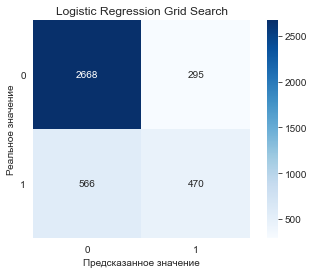

Accuracy:  0.784696
Precision: 0.614379
Recall:    0.453668
F1-score:  0.521932
ROC-AUC:   0.824932


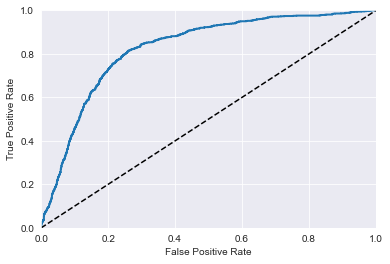

In [52]:
# logistic regression grid search predict
y_pred_lr = lr_best.predict(X_std_test)
y_prob_lr = lr_best.predict_proba(X_std_test)[:,1]
show_matrix_and_metrics(y_test, y_pred_lr, 'Logistic Regression Grid Search')
plot_roc_curve(y_test, y_prob_lr)

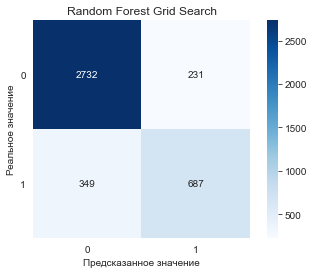

Accuracy:  0.854964
Precision: 0.748366
Recall:    0.663127
F1-score:  0.703173
ROC-AUC:   0.890566


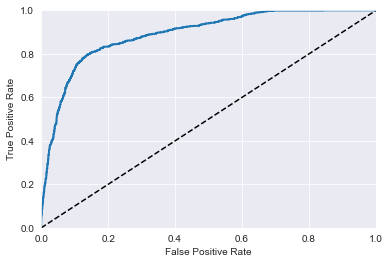

In [55]:
# random forest grid search predict
y_pred_rf = rf_best.predict(X_test)
y_prob_rf = rf_best.predict_proba(X_test)[:,1]
show_matrix_and_metrics(y_test, y_pred_rf, 'Random Forest Grid Search')
plot_roc_curve(y_test, y_prob_rf)

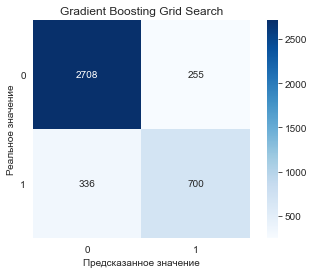

Accuracy:  0.852213
Precision: 0.732984
Recall:    0.675676
F1-score:  0.703164
ROC-AUC:   0.891969


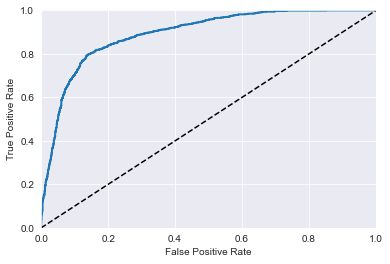

In [55]:
# gradient boosting grid search predict
y_pred_gb = gb_best.predict(X_std_test)
y_prob_gb = gb_best.predict_proba(X_std_test)[:,1]
show_matrix_and_metrics(y_test, y_pred_gb, 'Gradient Boosting Grid Search')
plot_roc_curve(y_test, y_prob_gb)

Подбор параметров с помощью поиска по сетке улучшил результаты для алгоритмов `Logistic Regression` и `Random Forest`.

Наибольшее значение F-меры получено для алгоритма `Gradient Boosting` при исходных параметрах.